<a href="https://colab.research.google.com/github/GauravPathak77/Assignment/blob/master/TruckTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive in Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing dataset to Colab’s working directory

In [ ]:
!cp /content/drive/MyDrive/Truck_Detection.v3i.yolov8.zip /content/

Unzip dataset

In [ ]:
import zipfile

dataset_path = "/content/Truck_Detection.v3i.yolov8.zip"
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# Verify Dataset Structure

In [ ]:
import os

print(os.listdir("/content/data"))

['valid', 'test', 'train', 'data.yaml', 'README.roboflow.txt']


Your dataset should have:

```
/content/data
    ├── train/ (975 images)
    ├── valid/ (90 images)
    ├── test/ (57 images)
    ├── data.yaml  # Dataset config file

```



Contents of data.yaml (it contains class names and paths)

In [ ]:
import yaml

with open("/content/data/data.yaml", "r") as f:
    data_yaml = yaml.safe_load(f)

print(data_yaml)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 6, 'names': ['Licenseplate', 'containerid', 'dot_number', 'mudflap', 'serial_number', 'tailight'], 'roboflow': {'workspace': 'jmss-hq', 'project': 'text-recognition-object-detection-d70wq', 'version': 3, 'license': 'Private', 'url': 'https://app.roboflow.com/jmss-hq/text-recognition-object-detection-d70wq/3'}}


# Install YOLOv8 & Train

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00


Train the model

In [ ]:
from ultralytics import YOLO

# Load YOLOv8s model (better than nano)
model = YOLO("yolov8s.pt")

# Train the model
model.train(
    data="/content/data/data.yaml",  # Path to dataset config
    epochs=50,              # Number of training epochs
    imgsz=640,              # Image size
    batch=16,               # Adjust based on GPU memory
    workers=2,              # Number of CPU threads
    optimizer="Adam",       # Adam optimizer for stable training
    dropout=0.1,            # Helps avoid overfitting
    val=True,               # Enable validation
    device=0                # Use GPU
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 298MB/s]


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 123MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 253MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 972 images, 6 backgrounds, 0 corrupt: 100%|██████████| 972/972 [00:01<00:00, 678.34it/s]

train: New cache created: /content/data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 810, len(boxes) = 7338. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/valid/labels... 94 images, 0 backgrounds, 0 corrupt: 100%|██████████| 94/94 [00:00<00:00, 486.07it/s]


val: New cache created: /content/data/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 57, len(boxes) = 696. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.82G      1.871      2.414      1.606        135        640: 100%|██████████| 61/61 [00:23<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all         94        696    0.00038    0.00191   0.000151   3.06e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.58G      1.821      1.633      1.617        113        640: 100%|██████████| 61/61 [00:23<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         94        696     0.0854      0.213     0.0548     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       4.6G      1.755      1.496      1.557        148        640: 100%|██████████| 61/61 [00:22<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         94        696      0.374       0.39      0.287      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.6G      1.737      1.477      1.537        130        640: 100%|██████████| 61/61 [00:19<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         94        696      0.524      0.433      0.391        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.6G      1.686      1.392      1.505        158        640: 100%|██████████| 61/61 [00:20<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         94        696      0.794      0.487      0.469      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       4.6G      1.643      1.355      1.494        106        640: 100%|██████████| 61/61 [00:19<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         94        696      0.781      0.457      0.431      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       4.6G      1.648       1.38      1.506        111        640: 100%|██████████| 61/61 [00:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         94        696      0.653      0.454      0.485      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.6G       1.63      1.354      1.481         87        640: 100%|██████████| 61/61 [00:19<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         94        696      0.867      0.475      0.508       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.6G      1.602      1.307      1.453        113        640: 100%|██████████| 61/61 [00:20<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         94        696      0.677      0.563      0.557      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       4.6G       1.57      1.266      1.441        104        640: 100%|██████████| 61/61 [00:19<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         94        696      0.719      0.595      0.518      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.6G      1.591      1.311      1.463         95        640: 100%|██████████| 61/61 [00:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         94        696      0.808      0.504      0.536      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       4.6G       1.56      1.233      1.437        194        640: 100%|██████████| 61/61 [00:19<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         94        696      0.868      0.493        0.6      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.6G      1.537      1.211      1.432        171        640: 100%|██████████| 61/61 [00:20<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         94        696       0.77      0.495      0.497       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       4.6G      1.538      1.219      1.438        130        640: 100%|██████████| 61/61 [00:19<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         94        696      0.722      0.614      0.566       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       4.6G      1.547      1.241      1.447        184        640: 100%|██████████| 61/61 [00:20<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         94        696      0.746      0.553      0.541      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       4.6G       1.54      1.223      1.425        192        640: 100%|██████████| 61/61 [00:19<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         94        696      0.798      0.558      0.547      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       4.6G      1.517      1.223      1.421        148        640: 100%|██████████| 61/61 [00:20<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         94        696      0.709      0.568      0.571      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       4.6G      1.503      1.166      1.414        133        640: 100%|██████████| 61/61 [00:20<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         94        696      0.845      0.561      0.568      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       4.6G      1.508      1.167       1.41        127        640: 100%|██████████| 61/61 [00:19<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         94        696      0.868      0.496      0.564      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.6G      1.526      1.182      1.415        150        640: 100%|██████████| 61/61 [00:20<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         94        696       0.77      0.597      0.597       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.6G      1.502      1.201      1.422        149        640: 100%|██████████| 61/61 [00:19<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         94        696      0.744      0.591      0.593      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       4.6G      1.478      1.168      1.399        132        640: 100%|██████████| 61/61 [00:20<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         94        696      0.758      0.635       0.59      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.6G      1.468      1.148      1.398        130        640: 100%|██████████| 61/61 [00:19<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         94        696      0.874      0.558      0.612      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.6G      1.457      1.115      1.377        128        640: 100%|██████████| 61/61 [00:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         94        696       0.76      0.638       0.61      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       4.6G      1.463      1.144      1.393        140        640: 100%|██████████| 61/61 [00:20<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         94        696      0.786      0.631      0.578      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.6G      1.425      1.098      1.362        120        640: 100%|██████████| 61/61 [00:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         94        696      0.748      0.655      0.601      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       4.6G      1.442      1.107      1.385        156        640: 100%|██████████| 61/61 [00:19<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         94        696      0.762       0.61      0.598      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.6G      1.452      1.077      1.374        141        640: 100%|██████████| 61/61 [00:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         94        696      0.767      0.584      0.606      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.6G      1.425      1.093      1.362        144        640: 100%|██████████| 61/61 [00:19<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         94        696      0.791      0.649       0.64      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.6G      1.407      1.065      1.347        106        640: 100%|██████████| 61/61 [00:20<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         94        696       0.75       0.63      0.604      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       4.6G      1.426      1.078      1.356        160        640: 100%|██████████| 61/61 [00:19<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         94        696      0.843      0.591      0.619      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       4.6G       1.42       1.04      1.356        161        640: 100%|██████████| 61/61 [00:20<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         94        696      0.752      0.647      0.609      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.6G      1.387       1.05      1.334         94        640: 100%|██████████| 61/61 [00:19<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         94        696      0.751      0.639      0.594      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.6G      1.376      1.021       1.32        197        640: 100%|██████████| 61/61 [00:20<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         94        696      0.755      0.615      0.605      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.6G      1.398      1.025      1.356        145        640: 100%|██████████| 61/61 [00:19<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         94        696      0.634      0.631      0.611      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.6G      1.398      1.043      1.329        129        640: 100%|██████████| 61/61 [00:20<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         94        696      0.797      0.636        0.6      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.6G      1.359      1.015      1.312        106        640: 100%|██████████| 61/61 [00:19<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         94        696      0.752      0.655      0.655      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       4.6G      1.358      1.015      1.328        168        640: 100%|██████████| 61/61 [00:20<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         94        696      0.797      0.626      0.635      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.6G      1.365      1.026      1.323        137        640: 100%|██████████| 61/61 [00:19<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         94        696       0.79      0.595      0.627      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.6G      1.338      1.001      1.306        154        640: 100%|██████████| 61/61 [00:20<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         94        696      0.782      0.634      0.637      0.392


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.6G      1.331     0.9807      1.365         88        640: 100%|██████████| 61/61 [00:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all         94        696      0.776      0.628      0.639      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.6G      1.321     0.9627      1.371         88        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         94        696      0.748      0.632      0.588      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.6G      1.303     0.9305      1.353         97        640: 100%|██████████| 61/61 [00:19<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         94        696      0.806      0.624      0.615      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       4.6G      1.298      0.909      1.358         81        640: 100%|██████████| 61/61 [00:19<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         94        696      0.779      0.638       0.63       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       4.6G      1.278     0.8918      1.329         89        640: 100%|██████████| 61/61 [00:19<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         94        696      0.791      0.622      0.619      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       4.6G      1.251     0.8723      1.318         77        640: 100%|██████████| 61/61 [00:19<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         94        696      0.588      0.649      0.627      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.6G      1.256     0.8699      1.319         81        640: 100%|██████████| 61/61 [00:19<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         94        696      0.797      0.628      0.623      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       4.6G       1.23      0.855      1.295        104        640: 100%|██████████| 61/61 [00:19<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         94        696      0.622      0.632      0.595      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.6G      1.213     0.8307      1.291         74        640: 100%|██████████| 61/61 [00:19<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         94        696      0.808      0.611      0.596      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.6G      1.207       0.81      1.287         87        640: 100%|██████████| 61/61 [00:19<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         94        696      0.624      0.646      0.606      0.364



50 epochs completed in 0.309 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]


                   all         94        696      0.752      0.655      0.656      0.404
          Licenseplate         92         94      0.914      0.915      0.892      0.496
           containerid          4          4      0.228       0.75      0.745      0.567
            dot_number          1          1          1          0          0          0
               mudflap         90        183      0.879      0.913      0.941      0.597
         serial_number         78         81       0.73      0.827       0.79      0.473
              tailight         92        333       0.76      0.523      0.566      0.293
Speed: 0.3ms preprocess, 6.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a4933518350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# Monitor Training Progress

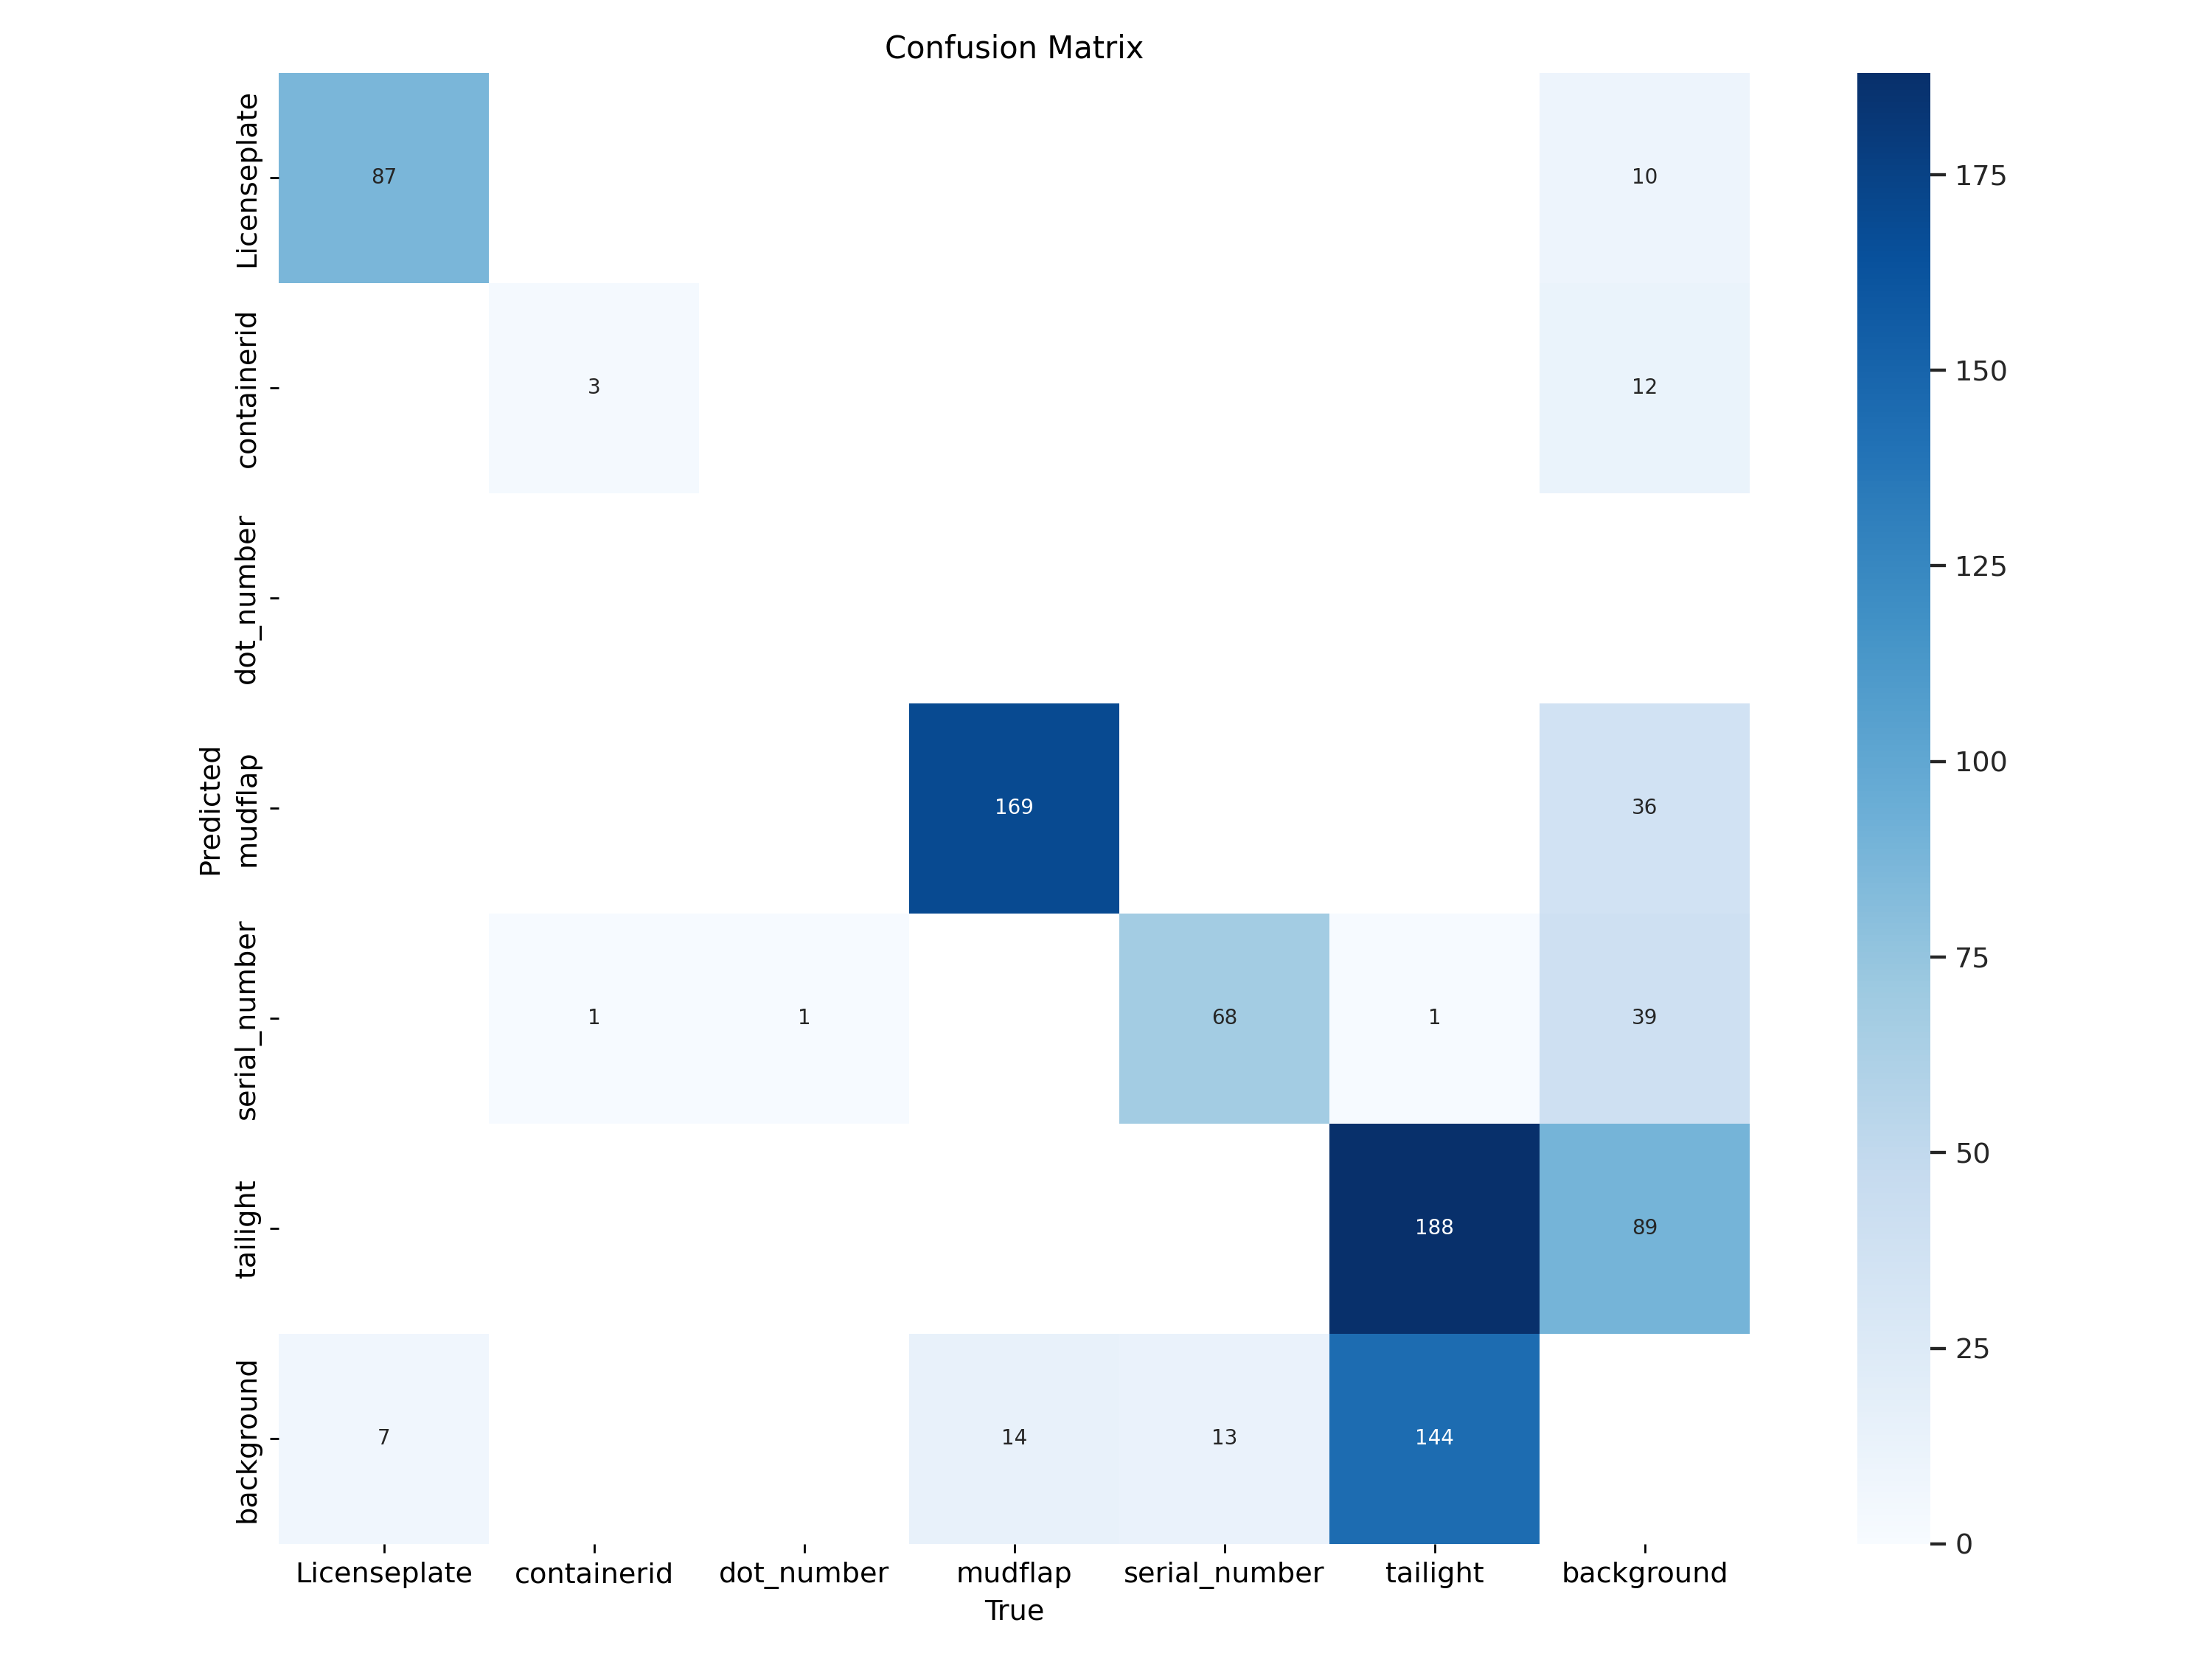

In [ ]:
from IPython.display import display, Image

display(Image(filename="runs/detect/train/confusion_matrix.png"))

# Test the Model

In [ ]:
model.predict("/content/drive/MyDrive/test.jpg", save=True, conf=0.5)


image 1/1 /content/drive/MyDrive/test.jpg: 640x640 1 Licenseplate, 1 containerid, 2 mudflaps, 1 serial_number, 16.3ms
Speed: 5.1ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Licenseplate', 1: 'containerid', 2: 'dot_number', 3: 'mudflap', 4: 'serial_number', 5: 'tailight'}
 obb: None
 orig_img: array([[[225, 172, 121],
         [225, 172, 121],
         [227, 173, 120],
         ...,
         [224, 175, 119],
         [230, 176, 111],
         [230, 176, 105]],
 
        [[225, 172, 121],
         [225, 172, 121],
         [227, 173, 120],
         ...,
         [224, 174, 121],
         [229, 177, 111],
         [230, 175, 106]],
 
        [[225, 172, 121],
         [225, 172, 121],
         [227, 173, 120],
         ...,
         [224, 174, 121],
         [229, 175, 114],
         [228, 175, 108]],
 
        ...,
 
        [[145, 130, 104],
         [150, 135, 109],
         [155, 140, 114],
         ...,
         [148, 134, 115],
         [145, 132, 110],
         [142, 129, 107]],
 
        [[145, 130, 

# Save & Download Trained Model

In [ ]:
from google.colab import files

files.download("runs/detect/train/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# mAP (mean Average Precision)

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
metrics = model.val()

print(f"mAP@50: {metrics.box.map50:.3f}")
print(f"mAP@50-95: {metrics.box.map:.3f}")

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/data/valid/labels.cache... 94 images, 0 backgrounds, 0 corrupt: 100%|██████████| 94/94 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 57, len(boxes) = 696. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all         94        696      0.752      0.653      0.656      0.405
          Licenseplate         92         94      0.913      0.904      0.889      0.498
           containerid          4          4      0.228       0.75      0.745      0.567
            dot_number          1          1          1          0          0          0
               mudflap         90        183      0.879      0.913      0.941      0.597
         serial_number         78         81       0.73      0.827      0.789      0.473
              tailight         92        333       0.76      0.523       0.57      0.294
Speed: 4.4ms preprocess, 10.4ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val2
mAP@50: 0.656
mAP@50-95: 0.405
